# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "../data/train.p"
validation_file="../data/valid.p"
testing_file = "../data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np
import pandas as pd

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape =  X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes =np.size(np.unique(y_train)) #48

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

Number of pictures trained for each class: [ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920  690
  540  360  990 1080  180  300  270  330  450  240 1350  540  210  480  240
  390  690  210  599  360 1080  330  180 1860  270  300  420]
Classes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]


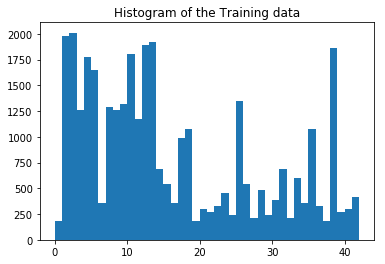

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import csv
# Visualizations will be shown in the notebook.
%matplotlib inline
filename="signnames.csv"

with open(filename, newline='', encoding="utf8") as csvfile:
        readline = csv.reader(csvfile, delimiter=',')
        labels_discription = [z[1] for z in readline][1:]
     
with open(filename, newline='', encoding="utf8") as csvfile:
        readline = csv.reader(csvfile, delimiter=',')
        labels_c = [z[0] for z in readline][1:]
        
#print("here",labels_c)
labels_c = [int(i) for i in labels_c] 
#print("here2",labels_c)


hist, bin_edges=np.histogram(y_train,bins=(labels_c))
print("Number of pictures trained for each class:",hist)
print("Classes:",bin_edges)
#print(np.array(labels_c).shape)
plt.hist(y_train,bins=(labels_c))
#plt.bar( np.array(labels_c),hist)  # arguments are passed to np.histogram
plt.title("Histogram of the Training data")
plt.savefig('histogram')
plt.show()
plt.close()

Updated Image Shape: (32, 32, 3)
Selecting n number of different traning samples


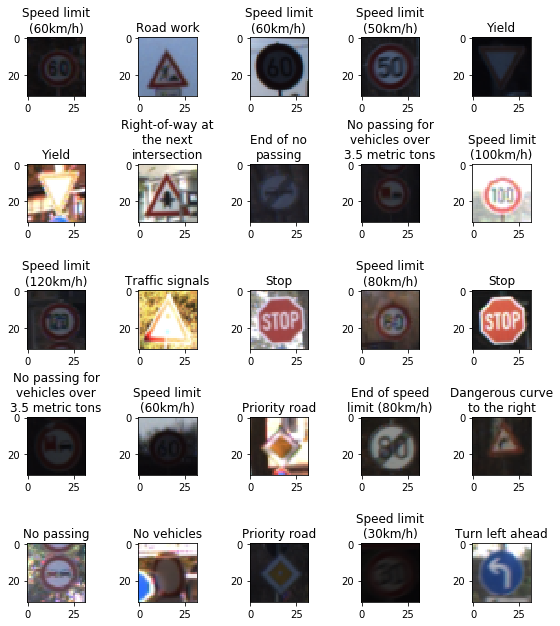

In [4]:
from textwrap import wrap

print("Updated Image Shape: {}".format(X_train[0].shape))
print("Selecting n number of different traning samples")

#fig, axs = plt.subplots(5, 5)
plt.figure(figsize=(10,10))
plt.subplots_adjust(left=0.2, bottom=0.1, right=0.9, top=0.9, wspace=0.9, hspace=0.8)


for u in range(25):
    index = random.randint(0, len(X_train))
    image = X_train[index].squeeze()
    ax = plt.subplot(5,5,u+1)
    ax.set_title("\n".join(wrap(labels_discription[y_train[index]],15)))
    
    plt.imshow(image)
    
    
#fig.tight_layout()
plt.show()   
    
#print("Label #:",y_train[index])
#print(labels_discription[y_train[index]])

Number of training data before adding more data: (34799, 32, 32, 3)
Number of training data after adding extra data: (36029, 32, 32, 3)
Number of training labels after adding extra data: (36029,)


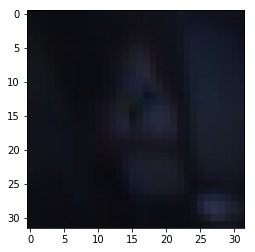

In [5]:
# Adding additinal data to improve the result
import cv2

print("Number of training data before adding more data:",X_train.shape)


def Produce_img(l,y_train,X_train):
    index=np.where(y_train==l)
    for i in range(len(index[0])):
        img=(X_train[index[0][i]])
        img_mod=(X_train[index[0][i]]).squeeze()
        #plt.imshow(img_mod)
        rows,cols,ch = img.shape
        pts1 = np.float32([[5,10],[30,5],[0,30],[30,30]])
        pts2 = np.float32([[0,0],[32,0],[0,32],[32,32]])
        M = cv2.getPerspectiveTransform(pts1,pts2)
        dst = cv2.warpPerspective(img,M,(32,32))
        #adding the data to the dataset
        #print(dst.shape)
        #print(X_train.shape)
        X_train = np.concatenate((X_train, [dst]),axis=0) 
        y_train = np.concatenate((y_train, [l]))
       # X_train.append(dst) 
        #y_train.append(l)
    return X_train, y_train

l=20
X_train, y_train=Produce_img(l,y_train,X_train)
X_train, y_train=Produce_img(31,y_train,X_train)
X_train, y_train=Produce_img(29,y_train,X_train)
        
index=np.where(y_train==l)
#print(index[0][10])
img_=(X_train[index[0][0]])
img_mod=(X_train[index[0][0]]).squeeze()
plt.imshow(img_mod)
pts1 = np.float32([[5,10],[30,5],[0,30],[30,30]])
pts2 = np.float32([[0,0],[32,0],[0,32],[32,32]])
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img_,M,(32,32))
dstWarp=(dst).squeeze()
plt.imshow(dstWarp)
#plt.imshow(img_mod)

print("Number of training data after adding extra data:",X_train.shape)
print("Number of training labels after adding extra data:",y_train.shape)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
import cv2
import pandas as pd
X_train_gray=pd.DataFrame()
t=[]
X_train, y_train = shuffle(X_train, y_train)

def img_normalize(img):
    img=img.astype(np.float32)
    #print(img.shape)
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY,dstCn=1)
    img = (img - [128])/128
    img=img.astype(np.float32)
    img=img.reshape(32,32,3)
    return img


#image=img_normalize(X_train[0])    
#print(image.shape)
X_train = np.array([img_normalize(x) for x in X_train ])
X_valid = np.array([img_normalize(x) for x in X_valid ])
X_test= np.array([img_normalize(x) for x in X_test ])

In [15]:
print("Updated Image normalized and gray Scale:")
#print(X_train[0].shape)
i=150
image =X_train[i].squeeze()
#mpimg.imsave('grayScaled2.jpg', image, cmap='gray')
#mpimg.imsave('grayScaled2.jpg', image)
print("Label #:",y_train[i])
print(labels_discription[y_train[i]])
#plt.imshow(image, cmap="gray")
#plt.imshow(image)

#plt.imshow(image)

Updated Image normalized and gray Scale:
Label #: 2
Speed limit (50km/h)


### Model Architecture

In [6]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from tensorflow.contrib.layers import flatten

EPOCHS = 10
BATCH_SIZE = 128
 

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    wc1= tf.Variable(tf.random_normal([5, 5, 1, 6], mean=mu, stddev=sigma))
    b1 = tf.Variable(tf.zeros([6]))
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    Conv1=tf.nn.conv2d(x,wc1,strides=[1,1,1,1], padding='VALID')
    Conv1=tf.nn.bias_add(Conv1,b1)

    # TODO: Activation.
    Conv1=tf.nn.relu(Conv1)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    MaxPool=tf.nn.max_pool(Conv1, ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    wc2= tf.Variable(tf.random_normal([5, 5, 6, 16], mean=mu, stddev=sigma))
    b2 = tf.Variable(tf.zeros([16]))
    Conv2=tf.nn.conv2d(MaxPool,wc2,strides=[1,1,1,1], padding='VALID')
    Conv2=tf.nn.bias_add(Conv2,b2)
    
    # TODO: Activation.
    Conv2=tf.nn.relu(Conv2)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    MaxPool=tf.nn.max_pool(Conv2, ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    
    print(MaxPool.shape)
    # TODO: Flatten. Input = 5x5x16. Output = 400.
    Flat=flatten(MaxPool)
    print("Flat dim",Flat.shape)
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    wc3= tf.Variable(tf.random_normal([400,120], mean=mu, stddev=sigma))
    b3 = tf.Variable(tf.zeros([120]))
    conv3=tf.add(tf.matmul(Flat,wc3),b3)
    
    
    # TODO: Activation.
    conv3=tf.nn.relu(conv3)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    wc4= tf.Variable(tf.random_normal([120,84], mean=mu, stddev=sigma))
    b4 = tf.Variable(tf.zeros([84]))
    conv4=tf.add(tf.matmul(conv3,wc4),b4)
    
    # TODO: Activation.
    conv4=tf.nn.relu(conv4)
    
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 10.
    wc5= tf.Variable(tf.random_normal([84,n_classes], mean=mu, stddev=sigma))
    b5 = tf.Variable(tf.zeros([n_classes]))
    conv4=tf.add(tf.matmul(conv4,wc5),b5)
    
    logits=conv4
    
    return logits

 


##### Note: LeNet Results after 10 Epoch:
Training...

EPOCH 1 ...
Validation Accuracy = 0.752

EPOCH 2 ...
Validation Accuracy = 0.833

EPOCH 3 ...
Validation Accuracy = 0.863

EPOCH 4 ...
Validation Accuracy = 0.864

EPOCH 5 ...
Validation Accuracy = 0.888

EPOCH 6 ...
Validation Accuracy = 0.903

EPOCH 7 ...
Validation Accuracy = 0.902

EPOCH 8 ...
Validation Accuracy = 0.903

EPOCH 9 ...
Validation Accuracy = 0.908

EPOCH 10 ...
Validation Accuracy = 0.911

## NETWORK WITHOUT DROPOUT

In [7]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

EPOCHS = 20
BATCH_SIZE = 128
mu = 0
sigma = 0.1

W = [
    tf.Variable(tf.truncated_normal((5,5,3,10), mean = mu, stddev = sigma)), #layer1
    tf.Variable(tf.truncated_normal((5,5,10,20), mean = mu, stddev = sigma)), #layer2
    tf.Variable(tf.truncated_normal((3,3,20,32), mean = mu, stddev = sigma)), #layer3
    tf.Variable(tf.truncated_normal((5,5,32,32), mean = mu, stddev = sigma)), #layer4
    tf.Variable(tf.truncated_normal((3,3,32,64), mean = mu, stddev = sigma)), #layer5
    tf.Variable(tf.truncated_normal((5,5,64,64), mean = mu, stddev = sigma)), #layer6
    tf.Variable(tf.truncated_normal((3,3,64,64), mean = mu, stddev = sigma)), #layer7
    tf.Variable(tf.truncated_normal((3,3,64,84), mean = mu, stddev = sigma)), #layer8
    tf.Variable(tf.truncated_normal((3136, 120), mean = mu, stddev = sigma)), #layer9
    tf.Variable(tf.truncated_normal((120, 84), mean = mu, stddev = sigma)), #layer10
    tf.Variable(tf.truncated_normal((84, n_classes), mean = mu, stddev = sigma)) #layer11
]
B = [
    tf.Variable(tf.zeros(10)),
    tf.Variable(tf.zeros(20)),
    tf.Variable(tf.zeros(32)),
    tf.Variable(tf.zeros(32)),
    tf.Variable(tf.zeros(64)),
    tf.Variable(tf.zeros(64)),
    tf.Variable(tf.zeros(64)),
    tf.Variable(tf.zeros(84)),
    tf.Variable(tf.zeros(120)),
    tf.Variable(tf.zeros(84)),
    tf.Variable(tf.zeros(n_classes))
] 

def Net_Improved(x):
    
    n=0
    Conv=x
    #input: 32X32X1 , output: 28x28x10 
    Conv=tf.nn.conv2d(Conv,W[n],strides=[1,1,1,1], padding='VALID')
    Conv=tf.nn.bias_add(Conv,B[n])
    Conv=tf.nn.relu(Conv) #layer1 activation
    n=n+1 
    
    #input: 28X28X10 , output: 24x24x20
    Conv=tf.nn.conv2d(Conv,W[n],strides=[1,1,1,1], padding='VALID')
    Conv=tf.nn.bias_add(Conv,B[n])
    Conv=tf.nn.relu(Conv) #layer2 activation
    n=n+1
    
    #input: 24X24X20 , output: 22x22x32
    Conv=tf.nn.conv2d(Conv,W[n],strides=[1,1,1,1], padding='VALID')
    Conv=tf.nn.bias_add(Conv,B[n])
    Conv=tf.nn.relu(Conv) #layer3 activation
    n=n+1
    
    #input: 22X22X32 , output: 21x21x32
    Conv=tf.nn.max_pool(Conv, ksize=[1,2,2,1],strides=[1,1,1,1],padding='VALID')
    
     #input: 21x21x32 , output: 17x17x32
    Conv=tf.nn.conv2d(Conv,W[n],strides=[1,1,1,1], padding='VALID')
    Conv=tf.nn.bias_add(Conv,B[n])
    Conv=tf.nn.relu(Conv) #layer4 activation
    n=n+1
    #input: 17x17x32 , output: 15x15x64
    Conv=tf.nn.conv2d(Conv,W[n],strides=[1,1,1,1], padding='VALID')
    Conv=tf.nn.bias_add(Conv,B[n])
    Conv=tf.nn.relu(Conv) #layer5 activation
    n=n+1
    
    #input: 15x15x64 , output: 14x14x64
    Conv=tf.nn.max_pool(Conv, ksize=[1,2,2,1],strides=[1,1,1,1],padding='VALID')
    
    #input: 14x14x64 , output: 10x10x64
    Conv=tf.nn.conv2d(Conv,W[n],strides=[1,1,1,1], padding='VALID')
    Conv=tf.nn.bias_add(Conv,B[n])
    Conv=tf.nn.relu(Conv) #layer6 activation
    n=n+1
    #input: 10x10x64 , output: 8x8x64
    Conv=tf.nn.conv2d(Conv,W[n],strides=[1,1,1,1], padding='VALID')
    Conv=tf.nn.bias_add(Conv,B[n])
    Conv=tf.nn.relu(Conv) #layer7 activation
    n=n+1    
    #print(Conv.shape)

    # TODO: Pooling. Input = 8x8x64 Output = 7x7x64.
    MaxPool=tf.nn.max_pool(Conv, ksize=[1,2,2,1],strides=[1,1,1,1],padding='VALID')
    
    #print("MAxPool",MaxPool.shape)
    
     #input: 7x7x64 , output: 8x8x84
    Conv=tf.nn.conv2d(Conv,W[n],strides=[1,1,1,1], padding='SAME')
    Conv=tf.nn.bias_add(Conv,B[n])
    Conv=tf.nn.relu(Conv) #layer8 activation
    n=n+1    
    
    print("conv after maxpool",Conv.shape)
    
    # TODO: Flatten. Input = 8x8x84. Output = 3136.
    Flat=flatten(MaxPool)
    print(Flat.shape)
    
    # TODO: Layer 3: Fully Connected. Input = 4096. Output = 120.

    Conv=tf.add(tf.matmul(Flat,W[n]),B[n])
    Conv=tf.nn.relu(Conv) #layer9 activation
    n=n+1
    
    #120, output 84
    Conv=tf.add(tf.matmul(Conv,W[n]),B[n])
    Conv=tf.nn.relu(Conv) #layer10 activation
    n=n+1
    
    #  Input = 84. Output = n-classes.

    logits=tf.add(tf.matmul(Conv,W[n]),B[n]) #layer11 
    
    
    return logits
    
    

##The validation accuracy for Improved version without Dropout :

EPOCH 1 ...
Validation Accuracy = 0.925

EPOCH 2 ...
Validation Accuracy = 0.944

EPOCH 3 ...
Validation Accuracy = 0.954

EPOCH 4 ...
Validation Accuracy = 0.951

EPOCH 5 ...
Validation Accuracy = 0.950

EPOCH 6 ...
Validation Accuracy = 0.941

EPOCH 7 ...
Validation Accuracy = 0.952

EPOCH 8 ...
Validation Accuracy = 0.964

EPOCH 9 ...
Validation Accuracy = 0.948

EPOCH 10 ...
Validation Accuracy = 0.975

EPOCH 11 ...
Validation Accuracy = 0.970

EPOCH 12 ...
Validation Accuracy = 0.974

EPOCH 13 ...
Validation Accuracy = 0.969

EPOCH 14 ...
Validation Accuracy = 0.974

EPOCH 15 ...
Validation Accuracy = 0.948

EPOCH 16 ...
Validation Accuracy = 0.967

EPOCH 17 ...
Validation Accuracy = 0.981

Adding Extra images (11) :

(Sample_5 - Prediction: 1 - True Label 2)
(Sample_6 - Prediction: 37 - True Label 37) 
(Sample_10 - Prediction: 22 - True Label 22) 
(Sample_9 - Prediction: 29 - True Label 29) 
(Sample_8 - Prediction: 38 - True Label 31) 
(Sample_2 - Prediction: 23 - True Label 23)
(Sample_11 - Prediction: 12 - True Label 12) 
(Sample_4 - Prediction: 23 - True Label 30)
(Sample_7 - Prediction: 15 - True Label 20)
(Sample_3 - Prediction: 13 - True Label 13) 
(Sample_1 - Prediction: 25 - True Label 25)


Accuracy of Extra Images = 63.6364 %

softmax Probability:
[[ 1 28  0 40 29] 
 [37 40 31 11  0]
 [22 17 26 37 18]
 [29 28 35  3 12]
 [38 31 29 11  8]
 [23 19 29 20  8]
 [12 11 38 40  3]
 [23 30  3 29 20]
 [15 25  8  5  1]
 [13 35 39  0  1]
 [25 24 22 20 26]]
 
 For the images that incorrectly labeled:
 We can see that for sample 5 and sample 7 the correct probability is not in the first two guesses, however for the sample 8 and sample 4 the correct label is in the second guess.  

## NETWORK with Dropout

In [7]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

EPOCHS = 20
BATCH_SIZE = 128
mu = 0
sigma = 0.1


W = [
    tf.Variable(tf.truncated_normal((3,3,1,30), mean = mu, stddev = sigma)), #layer1
    tf.Variable(tf.truncated_normal((5,5,30,40), mean = mu, stddev = sigma)), #layer2
    tf.Variable(tf.truncated_normal((3,3,40,40), mean = mu, stddev = sigma)), #layer3
    tf.Variable(tf.truncated_normal((5,5,40,50), mean = mu, stddev = sigma)), #layer4
    tf.Variable(tf.truncated_normal((3,3,50,50), mean = mu, stddev = sigma)), #layer5
    tf.Variable(tf.truncated_normal((5,5,50,64), mean = mu, stddev = sigma)), #layer6
    tf.Variable(tf.truncated_normal((3,3,64,64), mean = mu, stddev = sigma)), #layer7
    tf.Variable(tf.truncated_normal((3,3,64,84), mean = mu, stddev = sigma)), #layer8
    tf.Variable(tf.truncated_normal((5184, 120), mean = mu, stddev = sigma)), #layer9
    tf.Variable(tf.truncated_normal((120, 84), mean = mu, stddev = sigma)), #layer10
    tf.Variable(tf.truncated_normal((84, n_classes), mean = mu, stddev = sigma)) #layer11
]
B = [
    tf.Variable(tf.zeros(30)),
    tf.Variable(tf.zeros(40)),
    tf.Variable(tf.zeros(40)),
    tf.Variable(tf.zeros(50)),
    tf.Variable(tf.zeros(50)),
    tf.Variable(tf.zeros(64)),
    tf.Variable(tf.zeros(64)),
    tf.Variable(tf.zeros(84)),
    tf.Variable(tf.zeros(120)),
    tf.Variable(tf.zeros(84)),
    tf.Variable(tf.zeros(n_classes))
] 


def Net_Improved_Dropout(x):  
    n=0
    Conv=x
    #input: 32X32X1 , output: 30x30x30 
    Conv=tf.nn.conv2d(Conv,W[n],strides=[1,1,1,1], padding='VALID')
    Conv=tf.nn.bias_add(Conv,B[n])
    Conv=tf.nn.relu(Conv) #layer1 activation
    n=n+1 
    
    #input: 30X30X30 , output: 26x26x40
    Conv=tf.nn.conv2d(Conv,W[n],strides=[1,1,1,1], padding='VALID')
    Conv=tf.nn.bias_add(Conv,B[n])
    Conv=tf.nn.relu(Conv) #layer2 activation
    n=n+1
    
    #input: 26X26X40 , output: 24x24x40
    Conv=tf.nn.conv2d(Conv,W[n],strides=[1,1,1,1], padding='VALID')
    Conv=tf.nn.bias_add(Conv,B[n])
    Conv=tf.nn.relu(Conv) #layer3 activation
    n=n+1
    
    #input: 24X24X40 , output: 23x23x40
    MaxPool=tf.nn.max_pool(Conv, ksize=[1,2,2,1],strides=[1,1,1,1],padding='VALID')
    Conv=tf.nn.dropout(MaxPool, 0.7)
    
     #input: 23x23x40 , output: 19x19x50
    Conv=tf.nn.conv2d(Conv,W[n],strides=[1,1,1,1], padding='VALID')
    Conv=tf.nn.bias_add(Conv,B[n])
    Conv=tf.nn.relu(Conv) #layer4 activation
    n=n+1
    #input: 19x19x50 , output: 17x17x50
    Conv=tf.nn.conv2d(Conv,W[n],strides=[1,1,1,1], padding='VALID')
    Conv=tf.nn.bias_add(Conv,B[n])
    Conv=tf.nn.relu(Conv) #layer5 activation
    n=n+1
    
    #input: 17x17x50 , output: 16x16x50
    Conv=tf.nn.max_pool(Conv, ksize=[1,2,2,1],strides=[1,1,1,1],padding='VALID')
    
    #input: 16x16x64 , output: 12x12x64
    Conv=tf.nn.conv2d(Conv,W[n],strides=[1,1,1,1], padding='VALID')
    Conv=tf.nn.bias_add(Conv,B[n])
    Conv=tf.nn.relu(Conv) #layer6 activation
    n=n+1
    #input: 12x12x64 , output: 10x10x64
    Conv=tf.nn.conv2d(Conv,W[n],strides=[1,1,1,1], padding='VALID')
    Conv=tf.nn.bias_add(Conv,B[n])
    Conv=tf.nn.relu(Conv) #layer7 activation
    n=n+1    
    print(Conv.shape)

    # TODO: Pooling. Input = 10x10x64 Output = 9x9x64.
    MaxPool=tf.nn.max_pool(Conv, ksize=[1,2,2,1],strides=[1,1,1,1],padding='VALID')
    #dropout=tf.nn.dropout(MaxPool, 0.5)
    
    print("MAxPool",MaxPool.shape)
    
     #input: 9x9x64 , output: 9x9x84
    Conv=tf.nn.conv2d(Conv,W[n],strides=[1,1,1,1], padding='SAME')
    Conv=tf.nn.bias_add(Conv,B[n])
    Conv=tf.nn.relu(Conv) #layer8 activation
    n=n+1    
    
    print("conv after maxpool",Conv.shape)
    
    # TODO: Flatten. Input = 8x8x84. Output = 5184.
    Flat=flatten(MaxPool)
    print(Flat.shape)
    
    # TODO: Layer 3: Fully Connected. Input = 4096. Output = 120.

    Conv=tf.add(tf.matmul(Flat,W[n]),B[n])
    Conv=tf.nn.relu(Conv) #layer9 activation
    n=n+1
    dropout=tf.nn.dropout(Conv, 0.5)
    
    #120, output 84
    Conv=tf.add(tf.matmul(dropout,W[n]),B[n])
    Conv=tf.nn.relu(Conv) #layer10 activation
    n=n+1
    
    #  Input = 84. Output = n-classes.

    logits=tf.add(tf.matmul(Conv,W[n]),B[n]) #layer11 
   
    return logits   



#### Improved with dropouts 
EPOCH 1 ...
Validation Accuracy = 0.774

EPOCH 2 ...
Validation Accuracy = 0.868

EPOCH 3 ...
Validation Accuracy = 0.917

EPOCH 4 ...
Validation Accuracy = 0.940

EPOCH 5 ...
Validation Accuracy = 0.954

EPOCH 6 ...
Validation Accuracy = 0.954

EPOCH 7 ...
Validation Accuracy = 0.955

EPOCH 8 ...
Validation Accuracy = 0.967

EPOCH 9 ...
Validation Accuracy = 0.965

EPOCH 10 ...
Validation Accuracy = 0.960

EPOCH 11 ...
Validation Accuracy = 0.956

EPOCH 12 ...
Validation Accuracy = 0.965

EPOCH 13 ...
Validation Accuracy = 0.959

EPOCH 14 ...
Validation Accuracy = 0.975

EPOCH 15 ...
Validation Accuracy = 0.976

EPOCH 16 ...
Validation Accuracy = 0.975

EPOCH 17 ...
Validation Accuracy = 0.969

EPOCH 18 ...
Validation Accuracy = 0.973

EPOCH 19 ...
Validation Accuracy = 0.972

EPOCH 20 ...
Validation Accuracy = 0.978

Test Accuracy = 0.950

Sample_10 - Prediction: 22 - True Label 22 
Sample_5 - Prediction: 1 - True Label 2 
Sample_4 - Prediction: 23 - True Label 30 
Sample_2 - Prediction: 8 - True Label 23 
Sample_1 - Prediction: 25 - True Label 25 
Sample_7 - Prediction: 26 - True Label 20 
Sample_8 - Prediction: 14 - True Label 31 
Sample_11 - Prediction: 12 - True Label 12 
Sample_3 - Prediction: 13 - True Label 13 
Sample_6 - Prediction: 37 - True Label 37 
Sample_9 - Prediction: 16 - True Label 29 

Softmax top 5:

[[22 26  8 25 20]
 [ 1  5  2  4  8]
 [23  9 21 19 30]
 [23  9 39 37  2]
 [25 20 24 21 31]
 [ 9 26  8 15 33]
 [39 22 38 25 14]
 [12 40 25  2  7]
 [13 12 15  0  1]
 [37  9 15 35 26]
 [12 40 16  5  7]]

In [6]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

EPOCHS = 20
BATCH_SIZE = 128
mu = 0
sigma = 0.1


W = [
    tf.Variable(tf.truncated_normal((3,3,1,10), mean = mu, stddev = sigma)), #layer1
    tf.Variable(tf.truncated_normal((3,3,10,10), mean = mu, stddev = sigma)), #layer2
    tf.Variable(tf.truncated_normal((3,3,10,20), mean = mu, stddev = sigma)), #layer3
    tf.Variable(tf.truncated_normal((3,3,20,20), mean = mu, stddev = sigma)), #layer4
    tf.Variable(tf.truncated_normal((3,3,20,40), mean = mu, stddev = sigma)), #layer5
    tf.Variable(tf.truncated_normal((3,3,40,40), mean = mu, stddev = sigma)), #layer6
    tf.Variable(tf.truncated_normal((3,3,40,40), mean = mu, stddev = sigma)), #layer7
    tf.Variable(tf.truncated_normal((3,3,40,80), mean = mu, stddev = sigma)), #layer8
    tf.Variable(tf.truncated_normal((3,3,80,80), mean = mu, stddev = sigma)), #layer9
    tf.Variable(tf.truncated_normal((3,3,80,80), mean = mu, stddev = sigma)), #layer10
    tf.Variable(tf.truncated_normal((6480, 160), mean = mu, stddev = sigma)), #layer11
    tf.Variable(tf.truncated_normal((160, 80), mean = mu, stddev = sigma)), #layer12
    tf.Variable(tf.truncated_normal((80, n_classes), mean = mu, stddev = sigma)) #layer13
]
B = [
    tf.Variable(tf.zeros(10)),
    tf.Variable(tf.zeros(10)),
    tf.Variable(tf.zeros(20)),
    tf.Variable(tf.zeros(20)),
    tf.Variable(tf.zeros(40)),
    tf.Variable(tf.zeros(40)),
    tf.Variable(tf.zeros(40)),
    tf.Variable(tf.zeros(80)),
    tf.Variable(tf.zeros(80)),
    tf.Variable(tf.zeros(80)),
    tf.Variable(tf.zeros(160)),
    tf.Variable(tf.zeros(80)),
    tf.Variable(tf.zeros(n_classes))
] 


def VGG(x):  
    n=0
    Conv=x
    #input: 32X32X1 , output: 30x30x10 
    Conv=tf.nn.conv2d(Conv,W[n],strides=[1,1,1,1], padding='VALID')
    Conv=tf.nn.bias_add(Conv,B[n])
    Conv=tf.nn.relu(Conv) #layer1 activation
    n=n+1 
    
    #input: 30X30X10 , output: 28x28x10
    Conv=tf.nn.conv2d(Conv,W[n],strides=[1,1,1,1], padding='VALID')
    Conv=tf.nn.bias_add(Conv,B[n])
    Conv=tf.nn.relu(Conv) #layer2 activation
    n=n+1
    
    #input: 28X28X10 , output: 27x27x10
    Conv=tf.nn.max_pool(Conv, ksize=[1,2,2,1],strides=[1,1,1,1],padding='VALID')
    
     #input: 27x27x10 , output: 25x25x20
    Conv=tf.nn.conv2d(Conv,W[n],strides=[1,1,1,1], padding='VALID')
    Conv=tf.nn.bias_add(Conv,B[n])
    Conv=tf.nn.relu(Conv) #layer3 activation
    n=n+1
    #input: 25x25x20 , output: 23x23x20
    Conv=tf.nn.conv2d(Conv,W[n],strides=[1,1,1,1], padding='VALID')
    Conv=tf.nn.bias_add(Conv,B[n])
    Conv=tf.nn.relu(Conv) #layer4 activation
    n=n+1
    
    #input: 23x23x20 , output: 22x22x20
    Conv=tf.nn.max_pool(Conv, ksize=[1,2,2,1],strides=[1,1,1,1],padding='VALID')
    
    #input: 22x22x20 , output: 20x20x40
    Conv=tf.nn.conv2d(Conv,W[n],strides=[1,1,1,1], padding='VALID')
    Conv=tf.nn.bias_add(Conv,B[n])
    Conv=tf.nn.relu(Conv) #layer5 activation
    n=n+1
    #input: 18x18x40 , output: 16x16x40
    Conv=tf.nn.conv2d(Conv,W[n],strides=[1,1,1,1], padding='VALID')
    Conv=tf.nn.bias_add(Conv,B[n])
    Conv=tf.nn.relu(Conv) #layer6 activation
    n=n+1    
    #input: 16x16x40 , output: 14x14x40
    Conv=tf.nn.conv2d(Conv,W[n],strides=[1,1,1,1], padding='VALID')
    Conv=tf.nn.bias_add(Conv,B[n])
    Conv=tf.nn.relu(Conv) #layer7 activation
    n=n+1 

    # TODO: Pooling. Input = 14x14x40 Output = 13x13x40.
    MaxPool=tf.nn.max_pool(Conv, ksize=[1,2,2,1],strides=[1,1,1,1],padding='VALID')
    dropout=tf.nn.dropout(MaxPool, 0.5)
    
   
    #Input = 13x13x40 Output = 11x11x80.
    Conv=tf.nn.conv2d(Conv,W[n],strides=[1,1,1,1], padding='VALID')
    Conv=tf.nn.bias_add(Conv,B[n])
    Conv=tf.nn.relu(Conv) #layer8 activation
    n=n+1
    
    #print("B shape",B[n].shape)
    #print("W shape",W[n].shape)
    #print("conv shape",Conv.shape)
    
    #input: 11x11x80 , output: 9x9x80
    Conv=tf.nn.conv2d(Conv,W[n],strides=[1,1,1,1], padding='VALID')
    Conv=tf.nn.bias_add(Conv,B[n])
    Conv=tf.nn.relu(Conv) #layer9 activation
    n=n+1    
    
    #input: 9x9x80 , output: 8x8x80
    Conv=tf.nn.conv2d(Conv,W[n],strides=[1,1,1,1], padding='VALID')
    Conv=tf.nn.bias_add(Conv,B[n])
    Conv=tf.nn.relu(Conv) #layer10 activation
    n=n+1 
    print(Conv.shape)

    # TODO: Pooling. Input = 8x8x80 Output = 7x7x80.
    MaxPool=tf.nn.max_pool(Conv, ksize=[1,2,2,1],strides=[1,1,1,1],padding='VALID')
    dropout=tf.nn.dropout(MaxPool, 0.5)
    
    
    print("conv after maxpool",Conv.shape)
    
    # TODO: Flatten. Input = 7x7x80. Output = 6480.
    Flat=flatten(MaxPool)
    print(Flat.shape)
    
    # TODO: Layer 3: Fully Connected. Input = 4096. Output = 160.

    Conv=tf.add(tf.matmul(Flat,W[n]),B[n])
    Conv=tf.nn.relu(Conv) #layer11 activation
    n=n+1
    dropout=tf.nn.dropout(Conv, 0.5)
    
    #160, output 80
    Conv=tf.add(tf.matmul(dropout,W[n]),B[n])
    Conv=tf.nn.relu(Conv) #layer12 activation
    n=n+1
    
    #  Input = 84. Output = n-classes.

    logits=tf.add(tf.matmul(Conv,W[n]),B[n]) #layer13 
   
    return logits   


#### VGG Results:

EPOCH 1 ...
Validation Accuracy = 0.865

EPOCH 2 ...
Validation Accuracy = 0.919

EPOCH 3 ...
Validation Accuracy = 0.940

EPOCH 4 ...
Validation Accuracy = 0.961

EPOCH 5 ...
Validation Accuracy = 0.953

EPOCH 6 ...
Validation Accuracy = 0.947

EPOCH 7 ...
Validation Accuracy = 0.953

EPOCH 8 ...
Validation Accuracy = 0.960

EPOCH 9 ...
Validation Accuracy = 0.961

EPOCH 10 ...
Validation Accuracy = 0.960

EPOCH 11 ...
Validation Accuracy = 0.973

EPOCH 12 ...
Validation Accuracy = 0.968

EPOCH 13 ...
Validation Accuracy = 0.980

EPOCH 14 ...
Validation Accuracy = 0.969

EPOCH 15 ...
Validation Accuracy = 0.967

EPOCH 16 ...
Validation Accuracy = 0.963

EPOCH 17 ...
Validation Accuracy = 0.967

EPOCH 18 ...
Validation Accuracy = 0.969

EPOCH 19 ...
Validation Accuracy = 0.967

EPOCH 20 ...
Validation Accuracy = 0.973

Test Accuracy = 0.950


Sample_10 - Prediction: 9 - True Label 22 
Sample_5 - Prediction: 2 - True Label 2 
Sample_4 - Prediction: 23 - True Label 30 
Sample_2 - Prediction: 23 - True Label 23 
Sample_1 - Prediction: 25 - True Label 25 
Sample_7 - Prediction: 8 - True Label 20 
Sample_8 - Prediction: 12 - True Label 31 
Sample_11 - Prediction: 12 - True Label 12 
Sample_3 - Prediction: 13 - True Label 13 
Sample_6 - Prediction: 37 - True Label 37 
Sample_9 - Prediction: 12 - True Label 29 

[[15  9 22 10  8]
 [ 2  3  1 34  5]
 [12 29 30 23 40]
 [23 12 37 30 19]
 [25 22 28 38 23]
 [15 26  4  1 39]
 [12 38 23 31 25]
 [12 40 41  6 16]
 [13 38 35 34 36]
 [37 10 12 25 23]
 [12 41 40 38 23]]

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [8]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
rate = 0.001

x = tf.placeholder(tf.float32, (None, 32, 32, 3)) #colored
#x = tf.placeholder(tf.float32, (None, 32, 32,1)) #gray scale
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

#**********************Pipline training********************************

#logits = LeNet(x) #when performing leNet
logits=Net_Improved(x) # improved model no dropouts
#logits=Net_Improved_Dropout(x) #improved model with dropouts
#logits=VGG(x) #VGG
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

#**********************Pipline validation********************************

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

conv after maxpool (?, 8, 8, 84)
(?, 3136)


In [9]:


#******************Train Model**********************************
#tf.reset_default_graph()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.931

EPOCH 2 ...
Validation Accuracy = 0.950

EPOCH 3 ...
Validation Accuracy = 0.940

EPOCH 4 ...
Validation Accuracy = 0.954

EPOCH 5 ...
Validation Accuracy = 0.963

EPOCH 6 ...
Validation Accuracy = 0.964

EPOCH 7 ...
Validation Accuracy = 0.970

EPOCH 8 ...
Validation Accuracy = 0.962

EPOCH 9 ...
Validation Accuracy = 0.968

EPOCH 10 ...
Validation Accuracy = 0.978

EPOCH 11 ...
Validation Accuracy = 0.962

EPOCH 12 ...
Validation Accuracy = 0.972

EPOCH 13 ...
Validation Accuracy = 0.956

EPOCH 14 ...
Validation Accuracy = 0.971

EPOCH 15 ...
Validation Accuracy = 0.949

EPOCH 16 ...
Validation Accuracy = 0.957

EPOCH 17 ...
Validation Accuracy = 0.977

EPOCH 18 ...
Validation Accuracy = 0.954

EPOCH 19 ...
Validation Accuracy = 0.970

EPOCH 20 ...
Validation Accuracy = 0.982

Model saved


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

Label: 22 : Bumpy road
Label: 2 : Speed limit (50km/h)
Label: 30 : Beware of ice/snow
Label: 23 : Slippery road
Label: 25 : Road work
Label: 20 : Dangerous curve to the right
Label: 31 : Wild animals crossing
Label: 12 : Priority road
Label: 13 : Yield
Label: 37 : Go straight or left
Label: 29 : Bicycles crossing
(11, 32, 32, 3)


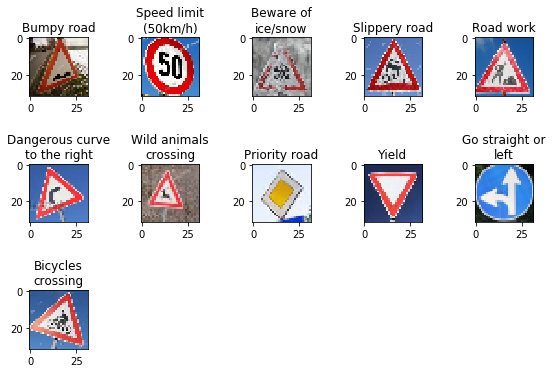

In [10]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import cv2
import matplotlib.image as mpimg 
import os
import glob
import tensorflow as tf
import numpy as np
from textwrap import wrap

%matplotlib inline

X_extra = []
img_name = []
Y_NEW_label=[]
Y_New=[25,23,13,30,2,37,20,31,29,22,12]

test_images = glob.glob('../extra-data/Sample*.jpg')
#print(test_images)

plt.figure(figsize=(10,10))
plt.subplots_adjust(left=0.2, bottom=0.1, right=0.9, top=0.9, wspace=0.9, hspace=0.8)
j=0
for fname in test_images:
    
    name_img = os.path.split(fname) 
    name_img=name_img[1].split(".")
    idx=int(name_img[0].split("_")[1])
    img_extra = mpimg.imread(fname)
    img_corrected = cv2.resize(img_extra, (32, 32))
    #img_extra=img_normalize(img_corrected)
    X_extra.append(img_corrected)
    img_name += [name_img[0]]
    Y_NEW_label+=[Y_New[idx-1]]
    ax = plt.subplot(5,5,j+1)
    ax.set_title("\n".join(wrap(labels_discription[Y_New[idx-1]],15)))

    print("Label:",Y_New[idx-1],":",labels_discription[Y_New[idx-1]])
    #plt.figure(figsize=(1,1))
    plt.imshow(img_corrected)
    j+=1

X_New = np.array([img_normalize(x) for x in X_extra ])
print(X_New.shape)

   
    
#fig.tight_layout()
plt.show()   



### Predict the Sign Type for Each Image

In [11]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
predicted_argmax = tf.argmax(logits, 1)
Out_softmax = tf.nn.softmax(logits)


with tf.Session() as sess:
    #sess.run(tf.global_variables_initializer())
    #saver = tf.train.import_meta_graph('./lenet.meta')
    #saver.restore(sess, tf.train.latest_checkpoint('.'))
    saver.restore(sess, './lenet')
    logits_predicted = sess.run(logits, feed_dict={x: X_New})
    softMax_results = sess.run(Out_softmax, feed_dict = {x: X_New})
    labels_predicted = np.argmax(logits_predicted, axis=1)
    #results = sess.run([Out_softmax, predicted_argmax], feed_dict = {x: X_New})
    for i in range(len(img_name)):
        print("{0} - Prediction: {1} - True Label {2} ".format(img_name[i],labels_predicted[i],Y_NEW_label[i]))


INFO:tensorflow:Restoring parameters from ./lenet
Sample_10 - Prediction: 31 - True Label 22 
Sample_5 - Prediction: 2 - True Label 2 
Sample_4 - Prediction: 28 - True Label 30 
Sample_2 - Prediction: 23 - True Label 23 
Sample_1 - Prediction: 25 - True Label 25 
Sample_7 - Prediction: 31 - True Label 20 
Sample_8 - Prediction: 13 - True Label 31 
Sample_11 - Prediction: 12 - True Label 12 
Sample_3 - Prediction: 13 - True Label 13 
Sample_6 - Prediction: 37 - True Label 37 
Sample_9 - Prediction: 12 - True Label 29 


### Analyze Performance

In [12]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
SoftM_probability=[]
detected=0
for i in range(len(labels_predicted)):
    if labels_predicted[i] == Y_NEW_label[i]:
            detected += 1
        
print("Accuracy of Extra Images = {:.4f} %".format(detected/len(labels_predicted)*100))


Accuracy of Extra Images = 54.5455 %


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [13]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    #saver.restore(sess, tf.train.latest_checkpoint('.'))
    softMax_probability = sess.run(tf.nn.top_k(softMax_results, k=5))
    print(softMax_probability.indices)
    print(softMax_probability.values)

[[31 26 22 18 27]
 [ 2  1  5  0 40]
 [28 23 30 25 29]
 [23 20 11 10  9]
 [25 26  8  7 35]
 [31 22  4 26 16]
 [13  9  3 12 38]
 [12 17 35 40 26]
 [13 39  1 37  9]
 [37 11 19 39 35]
 [12 29 26  7 30]]
[[  6.26111150e-01   2.48693302e-01   1.18433714e-01   6.56423531e-03
    1.32252258e-04]
 [  9.80494261e-01   1.95056871e-02   1.59169844e-09   2.44974513e-10
    2.93644761e-11]
 [  5.40469706e-01   4.45001155e-01   8.80181044e-03   3.60253640e-03
    1.99882826e-03]
 [  9.99999523e-01   4.38545811e-07   9.89964274e-12   5.24390752e-13
    4.80148148e-13]
 [  1.00000000e+00   3.73134446e-15   3.73970737e-16   2.76531402e-16
    1.31071855e-17]
 [  9.32610154e-01   5.59257157e-02   9.98280849e-03   1.38945703e-03
    4.40841832e-05]
 [  9.99867916e-01   1.31327659e-04   4.09243967e-07   1.03635038e-07
    8.12253163e-08]
 [  1.00000000e+00   1.43469817e-22   1.22428969e-25   4.79826587e-26
    2.89904726e-27]
 [  1.00000000e+00   1.83670392e-27   1.87836283e-32   1.33202853e-34
    1.49779

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [14]:
# Accuracy of the test-sets
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.963
